In [2]:
import torch

In [3]:
w = torch.tensor(-10.0, requires_grad = True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)

f = -3 * X

<function matplotlib.pyplot.show(close=None, block=None)>

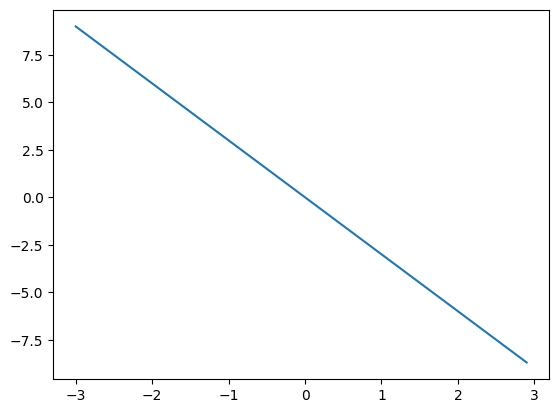

In [4]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show

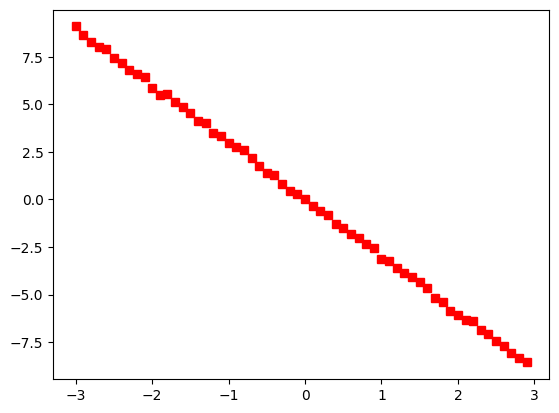

In [5]:
Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'rs')
plt.show()

In [6]:
def forward(x): # Equation of the line
    return w * x

In [7]:
def criterion(yhat, y): # cost function
    return torch.mean((yhat -y) ** 2)

In [12]:
lr = 0.1
num_epochs = 5

yhat_history = []

for epoch in range(num_epochs):
    yhat = forward(X)
    loss = criterion(yhat, Y)   

    yhat_history.append(yhat.detach().numpy())


    loss.backward()
    
    w.data = w.data - lr * w.grad.data
    
    w.grad.data.zero_()


# for epoch in range(4):
#     yhat = forward(X)
#     loss = criterion(yhat, Y)
#     loss.backward() # calculate the derivative
    
#     w.data = w.data - lr * w.grad.data
#     w.grad.data.zero_()

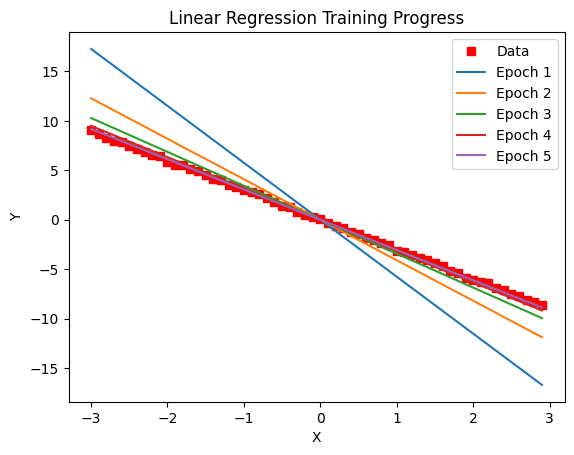

In [13]:
plt.plot(X.numpy(), Y.numpy(), 'rs', label='Data')

for i, yhat_epoch in enumerate(yhat_history):
    plt.plot(X.numpy(), yhat_epoch, label=f'Epoch {i+1}')

plt.legend()
plt.title('Linear Regression Training Progress')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()